In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\USER\\Desktop\\final projects for my own job search\\time series'

In [3]:
# Importing dataset
df = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByCountry (1).csv")

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


# Data cleaning

In [6]:
# Converting 'dt' column to 'datetime' object.

df['dt'] = pd.to_datetime(df['dt'])

In [7]:
# Adding column 'year' to sort the data

df['year'] = df['dt'].apply(lambda x : x.year)

In [8]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,NaN,NaN,Åland,1743
2,1744-01-01,NaN,NaN,Åland,1744
3,1744-02-01,NaN,NaN,Åland,1744
4,1744-03-01,NaN,NaN,Åland,1744
...,...,...,...,...,...
577457,2013-01-05,19.059,1.022,Zimbabwe,2013
577458,2013-01-06,17.613,0.473,Zimbabwe,2013
577459,2013-01-07,17.000,0.453,Zimbabwe,2013
577460,2013-01-08,19.759,0.717,Zimbabwe,2013


In [9]:
df = df.sort_values(by='year') # Sorting

In [10]:
df = df.set_index('year')  # Setting year as index

In [11]:
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
year,,,,
1743,1743-11-01,4.384,2.294,Åland
1743,1743-11-01,10.692,1.857,Guernsey
1743,1743-12-01,NaN,NaN,Guernsey


In [12]:
df = df.loc[2000:]  # Filtering the data from year 2000

In [13]:
df = df[df['Country']=='India']  # Extracting data of 'india'

# Data preprocess

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 2000 to 2013
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             165 non-null    datetime64[ns]
 1   AverageTemperature             164 non-null    float64       
 2   AverageTemperatureUncertainty  164 non-null    float64       
 3   Country                        165 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.4+ KB


In [15]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
year,,,,
2000,2000-01-07,26.980,0.260,India
2000,2000-01-08,26.821,0.306,India
2000,2000-01-09,26.505,0.134,India
2000,2000-01-10,25.583,0.222,India
2000,2000-01-11,21.986,0.157,India


In [16]:
df = df.reset_index()

In [17]:
df.sort_values('dt',inplace=True)

In [18]:
df

,year,dt,AverageTemperature,AverageTemperatureUncertainty,Country
10,2000,2000-01-01,17.840,0.210,India
11,2000,2000-01-02,19.071,0.159,India
9,2000,2000-01-03,23.674,0.183,India
8,2000,2000-01-04,28.868,0.190,India
7,2000,2000-01-05,30.089,0.166,India
...,...,...,...,...,...
160,2013,2013-01-05,31.014,0.205,India
159,2013,2013-01-06,28.766,0.299,India
158,2013,2013-01-07,27.012,0.197,India
157,2013,2013-01-08,26.555,0.242,India


In [19]:
# Dropping unwanted rows.
df = df.drop(['year','AverageTemperatureUncertainty','Country'] , axis=1)

In [20]:
# R
df.fillna(method='ffill' , inplace=True)

In [21]:
df.head()

,dt,AverageTemperature
10,2000-01-01,17.840
11,2000-01-02,19.071
9,2000-01-03,23.674
8,2000-01-04,28.868
7,2000-01-05,30.089


In [22]:
# Converting index object type to datetime object
df['dt'] = pd.to_datetime(df['dt'])

In [23]:
df.set_index('dt',inplace=True)

In [24]:
df.head()

,AverageTemperature
dt,
2000-01-01,17.840
2000-01-02,19.071
2000-01-03,23.674
2000-01-04,28.868
2000-01-05,30.089


In [25]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='dt', length=165, freq=None)

In [26]:
# Check for missing values
df.isna().sum()

AverageTemperature    0
dtype: int64

In [27]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='dt', length=165, freq=None)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2000-01-01 to 2013-01-09
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  165 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


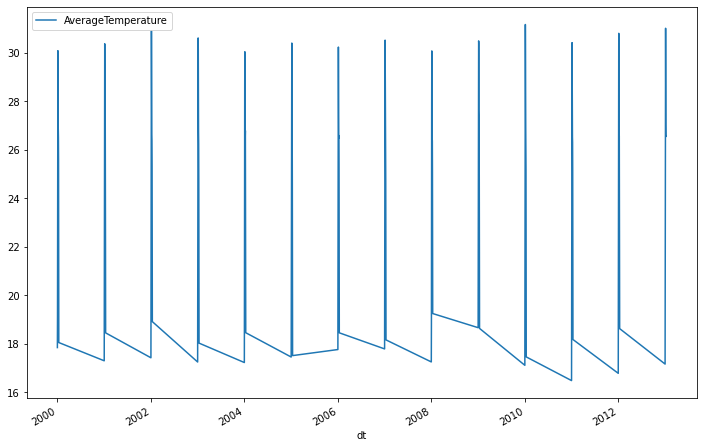

In [29]:
df.plot(figsize=(12,8))

In [30]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='dt', length=165, freq=None)

In [31]:
df

,AverageTemperature
dt,
2000-01-01,17.840
2000-01-02,19.071
2000-01-03,23.674
2000-01-04,28.868
2000-01-05,30.089
...,...
2013-01-05,31.014
2013-01-06,28.766
2013-01-07,27.012


In [32]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='dt', length=165, freq=None)

# Data split

In [33]:
train = df[0:131] #80% for train data
test = df[131:] # 20% for test data

# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(train)

MinMaxScaler()

In [37]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time seres generator

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
# length: Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train , scaled_train , length=12, batch_size=1)

In [40]:
len(scaled_train)

131

In [41]:
len(generator)  # length of generator will be len(scaled_train) - length

119

# Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [43]:
# define model
model = Sequential()  # initiating topology of network
model.add(LSTM(100, activation='relu', input_shape=(12, 1))) # input layer is LSTM
model.add(Dense(1)) # Output layer
model.compile(optimizer='adam', loss='mse')

In [44]:
# summary of model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Training the model
model.fit_generator(generator , epochs=50 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
119/119 [==============================] - 1s 10ms/step - loss: 0.1136
Epoch 2/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0832
Epoch 3/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0537
Epoch 4/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0252
Epoch 5/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0130
Epoch 6/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0111
Epoch 7/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0067
Epoch 8/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch 9/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0051
Epoch 10/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 11/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 12/50
119/119 [=========

In [46]:
test_predictions = []  # empty list

first_eval_batch = scaled_train[-12:]   # last 12 values from training data
current_batch = first_eval_batch.reshape((1, 12, 1))  # Inorder to predict , we need to reshape the data.
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]  # Prediction
    test_predictions.append(current_pred) # Storing prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # update batch to include prediction and drop first value

In [47]:
# Actual values

scaled_test

array([[ 0.02460882],
       [-0.04487909],
       [ 0.21059744],
       [ 0.53243243],
       [ 0.72290185],
       [ 0.94679943],
       [ 0.83655761],
       [ 0.71834993],
       [ 0.67027027],
       [ 0.65519203],
       [ 0.5655761 ],
       [ 0.34658606],
       [ 0.07567568],
       [-0.02354196],
       [ 0.19075391],
       [ 0.51529161],
       [ 0.77937411],
       [ 0.97411095],
       [ 0.95497866],
       [ 0.75320057],
       [ 0.68463727],
       [ 0.6715505 ],
       [ 0.53207681],
       [ 0.28826458],
       [ 0.10761024],
       [ 0.00362731],
       [ 0.22290185],
       [ 0.53100996],
       [ 0.77325747],
       [ 0.98897582],
       [ 0.82908962],
       [ 0.70433855],
       [ 0.67183499],
       [ 0.67183499]])

In [48]:
# predictions

test_predictions

[array([0.07282155], dtype=float32),
 array([0.02573266], dtype=float32),
 array([0.30577534], dtype=float32),
 array([0.6306478], dtype=float32),
 array([0.87357754], dtype=float32),
 array([0.95330274], dtype=float32),
 array([0.87565064], dtype=float32),
 array([0.74615127], dtype=float32),
 array([0.67720515], dtype=float32),
 array([0.6191038], dtype=float32),
 array([0.5234725], dtype=float32),
 array([0.3140981], dtype=float32),
 array([0.0585123], dtype=float32),
 array([0.01631743], dtype=float32),
 array([0.2943079], dtype=float32),
 array([0.608321], dtype=float32),
 array([0.8452165], dtype=float32),
 array([0.9209835], dtype=float32),
 array([0.8574344], dtype=float32),
 array([0.74863607], dtype=float32),
 array([0.6670618], dtype=float32),
 array([0.59588414], dtype=float32),
 array([0.48588467], dtype=float32),
 array([0.27812034], dtype=float32),
 array([0.05298676], dtype=float32),
 array([0.01239665], dtype=float32),
 array([0.27844408], dtype=float32),
 array([0.586

In [49]:
# Inverse transformation of predictions

true_pred = scaler.inverse_transform(test_predictions)

In [50]:
# Adding predicted values to actual values which are in test data.
test['predictions'] = true_pred

<ipython-input-50-4bbc625e8aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_pred


In [51]:
test

,AverageTemperature,predictions
dt,,
2010-01-12,17.455,18.132871
2011-01-01,16.478,17.470801
2011-01-02,20.070,21.408201
2011-01-03,24.595,25.975908
2011-01-04,27.273,29.391500
2011-01-05,30.421,30.512437
2011-01-06,28.871,29.420648
2011-01-07,27.209,27.599887
2011-01-08,26.533,26.630504


In [ ]:
It can be seen tat predicted values are almost close to actual values. 
LSTM worked better compared to forecasting models.